## Regression using ANN - Keras

Some hyperparameters we will play with are:

Adding and removing dropouts in convolutional layers

Batch Normalization (BN)

L2 regularisation

Increasing the number of convolution layers

Increasing the number of filters in certain layers 

In [128]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [129]:
# Reading the dataset
df = pd.read_csv("Data_to_ModelBuilding.csv")

# Display the first few rows of the dataset
df.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4,price
0,20,150,150000,1,0,0,1,0,0,0,...,0,0,0,1,0,2,0,0,0,4450
1,18,163,150000,0,0,0,0,0,0,0,...,0,0,0,1,0,39,1,0,0,13299
2,20,101,150000,1,0,0,0,0,0,0,...,0,0,0,1,0,38,0,0,1,3200
3,17,86,60000,0,0,0,0,0,1,0,...,0,0,1,1,0,30,0,0,1,4500
4,15,185,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,39,0,0,1,18750


In [130]:
X = df.copy()
# Remove target
y = X.pop('price')

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)  
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [133]:
X_train.shape, X_test.shape

((30852, 23), (13223, 23))

In [134]:
y_train.shape , y_test.shape

((30852,), (13223,))

In [135]:
X_train.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4
0,0.166667,0.021923,0.827586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.974359,0.0,0.0,1.0
1,0.133333,0.059292,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.512821,0.0,0.0,1.0
2,0.211111,0.103637,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.512821,1.0,0.0,0.0
3,0.211111,0.032387,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.025641,0.0,1.0,0.0
4,0.233333,0.027404,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.615385,0.0,1.0,0.0


In [136]:
y_train.head()

34921    2950
33036    6300
25839    7499
3448     2500
20701     950
Name: price, dtype: int64

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [138]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Create a dictionary to store the test R2 scores for each learning rate
test_r2_scores = {}

for lr in learning_rates:
    model = Sequential()
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    
    check_model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    
    history = check_model.fit(x=X_train, y=y_train.values,
                        validation_data=(X_test, y_test.values),
                        batch_size=128, epochs=100, verbose=0)
    
    # Evaluate on Test Set
    test_predictions = check_model.predict(X_test)
    test_r2 = r2_score(y_test, test_predictions)
    test_r2_scores[lr] = test_r2

# Print the test R2 scores for each learning rate
for lr, test_r2 in test_r2_scores.items():
    print(f'Test R2 Score for Learning Rate {lr}: {test_r2}')

# Choose the best learning rate based on the test R2 scores
best_lr = max(test_r2_scores, key=test_r2_scores.get)
print(f'Best Learning Rate: {best_lr}')

414/414 [==============================] - 1s 2ms/step
Test R2 Score for Learning Rate 0.001: -1.1733324714491289e-05
Test R2 Score for Learning Rate 0.01: -1.153949267651555e-05
Test R2 Score for Learning Rate 0.1: -1.1141758304411553e-05
Test R2 Score for Learning Rate 0.5: -1.3473843754052695e-05
Best Learning Rate: 0.1


In [139]:
# Model Definition with the best learning rate
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=best_lr), loss='mse')

## Training the Model

In [140]:
import time

start_time = time.time()

history = model.fit(x=X_train, y=y_train.values,
                    validation_data=(X_test, y_test.values),
                    batch_size=128, epochs=100)

end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 33761228.0000 - val_loss: 33256142.0000
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 28481066.0000 - val_loss: 24351846.0000
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 26148526.0000 - val_loss: 22944856.0000
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 25120528.0000 - val_loss: 23168344.0000
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 23560602.0000 - val_loss: 21339402.0000
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 23730164.0000 - val_loss: 27594826.0000
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 23180996.0000 - val_loss: 27153806.0000
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 24196730.0000 - val_loss: 22229506.0000
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 22727

242/242 [==============================] - 1s 3ms/step - loss: 13425731.0000 - val_loss: 13622086.0000
Epoch 72/100
242/242 [==============================] - 1s 4ms/step - loss: 13371771.0000 - val_loss: 13886432.0000
Epoch 73/100
242/242 [==============================] - 1s 3ms/step - loss: 13902402.0000 - val_loss: 14131420.0000
Epoch 74/100
242/242 [==============================] - 1s 3ms/step - loss: 13607920.0000 - val_loss: 13433126.0000
Epoch 75/100
242/242 [==============================] - 1s 3ms/step - loss: 13382211.0000 - val_loss: 14334006.0000
Epoch 76/100
242/242 [==============================] - 1s 4ms/step - loss: 13462801.0000 - val_loss: 14094075.0000
Epoch 77/100
242/242 [==============================] - 1s 3ms/step - loss: 14183961.0000 - val_loss: 13631896.0000
Epoch 78/100
242/242 [==============================] - 1s 4ms/step - loss: 13786283.0000 - val_loss: 13450524.0000
Epoch 79/100
242/242 [==============================] - 1s 3ms/step - loss: 14020425.

In [141]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

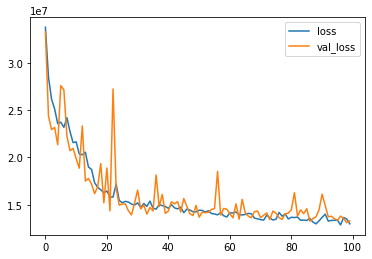

In [142]:
losses.plot()

## Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score

In [144]:
# Evaluate on Training Set
train_predictions = model.predict(X_train)
train_accuracy = r2_score(y_train, train_predictions)
print(f'Training R2 Score: {train_accuracy}')

# Evaluate on Test Set
test_predictions = model.predict(X_test)
test_accuracy = r2_score(y_test, test_predictions)
print(f'Test R2 Score: {test_accuracy}')

965/965 [==============================] - 2s 2ms/step
Training R2 Score: 0.7964078902734463
414/414 [==============================] - 1s 2ms/step
Test R2 Score: 0.7854998301003627


### Predicting on Brand New Data

In [145]:
# Additional Evaluation Metrics
mean_absolute_error_value = mean_absolute_error(y_test, test_predictions)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, test_predictions))
explained_variance = explained_variance_score(y_test, test_predictions)

print(f'Mean Absolute Error: {mean_absolute_error_value}')
print(f'Root Mean Squared Error: {root_mean_squared_error}')
print(f'Explained Variance: {explained_variance}')

Mean Absolute Error: 1919.2500405731698
Root Mean Squared Error: 3645.5200973470423
Explained Variance: 0.7879425184565894


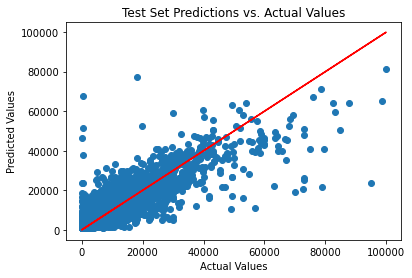

In [146]:
# Visualization
plt.scatter(y_test, test_predictions)
plt.plot(y_test, y_test, 'r')
plt.title('Test Set Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

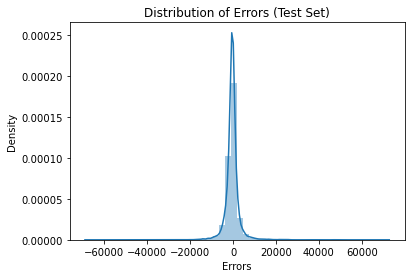

In [147]:
# errors
errors = y_test.values.reshape(len(y_test), 1) - test_predictions
sns.distplot(errors)
plt.title('Distribution of Errors (Test Set)')
plt.xlabel('Errors')
plt.show()